<a href="https://colab.research.google.com/github/tuetkwanwing/DS701-Tools-for-Data-Science/blob/main/hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Howework 1

The goal of this homework is make you practice the clustering techniques that you have seen in class.

## Warmup

"…make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding." F.J. Anscombe, 1973.

In [1]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=5c6294831b3ebda498a3b049ae0bcbe3f457cf2d9262ed04ad44b91887fa6140
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=ec25605fd1d538c4c6b5e2335698fcac99bcfa86b1d7c4299431f2a0edfe4316
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [2]:
# you need all of these packages;  if you don't have them, install them
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import csv
import numpy as np
import sklearn
# to get the umap package, run 'pip install umap-learn' before executing this notebook
import umap

Read the files ```datasaurus_data.csv``` and ```angled_blob.csv```, and then print their basic statistics (mean, standard deviation, etc.). Is there any difference between these datasets based on these statistics? (It is sufficient to conduct only a visual inspection of the values).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
datasaurus = pd.read_csv('/content/drive/MyDrive/homework-1-tuetkwanwing/datasaurus_data.csv', header=None)

angled_blob = pd.read_csv('/content/drive/MyDrive/homework-1-tuetkwanwing/angled_blob.csv', usecols=[1,2])

In [5]:
datasaurus

,0,1
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333
...,...,...
137,39.4872,25.3846
138,91.2821,41.5385
139,50.0000,95.7692
140,47.9487,95.0000


In [6]:
angled_blob

,x,y
0,46.091429,52.774646
1,46.872836,8.323791
2,46.834888,40.629085
3,55.128125,42.681831
4,78.608795,71.169001
...,...,...
995,59.130673,73.585572
996,54.708155,57.838008
997,65.401620,48.906174
998,36.703860,34.430772


Now, plot the boxplot for each dataset and compare the distributions between datasets for each feature (compare the $x$ feature across datasets and the $y$ feature across datasets). Are the boxplots **very different**? (Again, it is sufficient to conduct only a visual inspection of the boxplots).

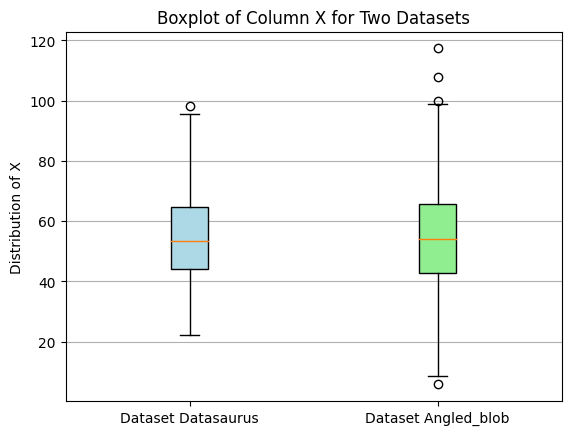

In [7]:

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have two datasets in DataFrames: df1 and df2
# Replace df1 and df2 with the actual names of your DataFrames.

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the boxplots for the 'x' column from both datasets
boxplot1 = ax.boxplot(datasaurus[0], positions=[1], labels=['Dataset Datasaurus'], patch_artist=True)
boxplot2 = ax.boxplot(angled_blob['x'], positions=[2], labels=['Dataset Angled_blob'], patch_artist=True)

# Set colors for the boxplots
colors = ['lightblue', 'lightgreen']
for box, color in zip([boxplot1, boxplot2], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Add labels and title
ax.set_ylabel('Distribution of X')
ax.set_title('Boxplot of Column X for Two Datasets')

# Show the plot
plt.grid(axis='y')
plt.show()

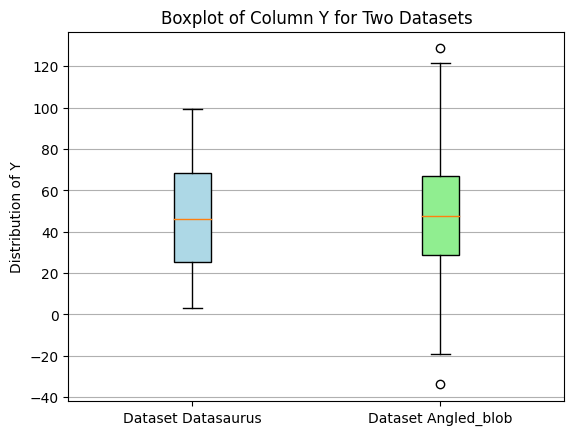

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have two datasets in DataFrames: df1 and df2
# Replace df1 and df2 with the actual names of your DataFrames.

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the boxplots for the 'x' column from both datasets
boxplot1 = ax.boxplot(datasaurus[1], positions=[1], labels=['Dataset Datasaurus'], patch_artist=True)
boxplot2 = ax.boxplot(angled_blob['y'], positions=[2], labels=['Dataset Angled_blob'], patch_artist=True)

# Set colors for the boxplots
colors = ['lightblue', 'lightgreen']
for box, color in zip([boxplot1, boxplot2], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Add labels and title
ax.set_ylabel('Distribution of Y')
ax.set_title('Boxplot of Column Y for Two Datasets')

# Show the plot
plt.grid(axis='y')
plt.show()

The middle boxes of both boxplots are mainly the same, suggesting that the middle 50% of the data for both groups is similar.
While dataset Angled_blob does have longer whiskers and a few more outlier points for both x and y, and especially for Y. With longer whiskers we might consider that the data points would have a wider range and are more spread out from the median, suggesting a greater variability in the data compared to the other Datasauraus.

In [9]:
#import seaborn as sns
#sns.boxplot(angled_blob)

In [10]:
#import seaborn as sns
#sns.boxplot(datasaurus)

Now, plot a scatter plot of each dataset and compare them. **Are the datasets different?**

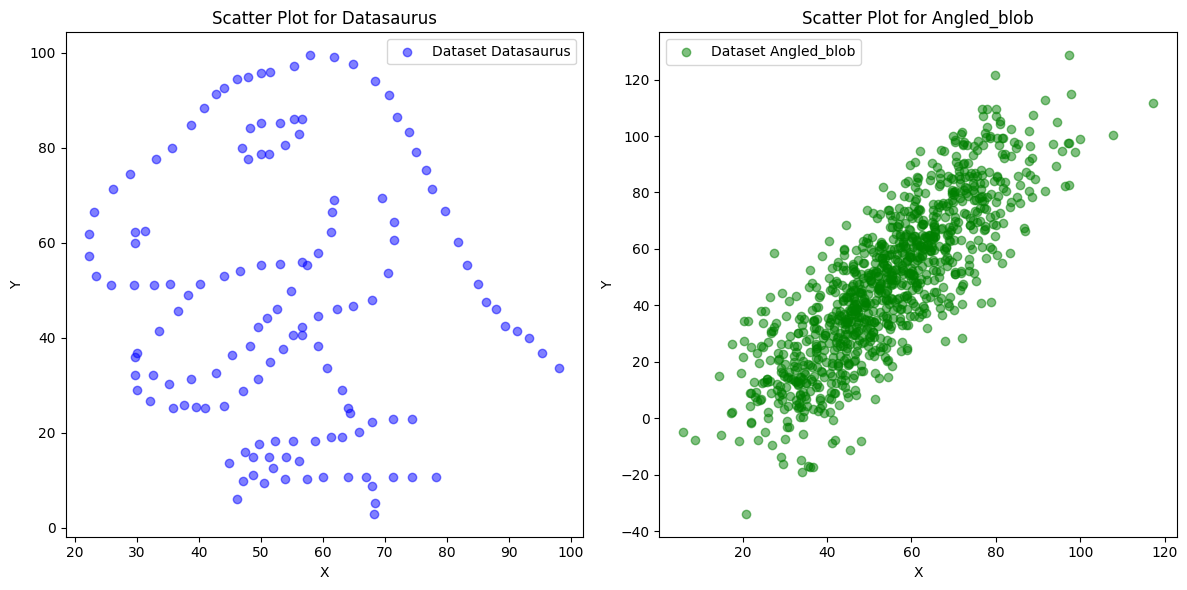

In [11]:
# Create a figure with two subplots (one for each dataset)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Dataset 1
ax1.scatter(datasaurus[0], datasaurus[1], c='blue', label='Dataset Datasaurus', alpha=0.5)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Scatter Plot for Datasaurus')
ax1.legend()

# Scatter plot for Dataset 2
ax2.scatter(angled_blob['x'], angled_blob['y'], c='green', label='Dataset Angled_blob', alpha=0.5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Scatter Plot for Angled_blob')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




Now with the comparison between two scatterplots, we can tell these two datasets are quite different.


## Part 1

In this part, you will cluster using different algorithms a dataset that has multiple information about individuals.

### Dataset reading and pre-processing

In this part, you will read the dataset and pre-process it. For each step that you do, we expect an explanation about why you did it.

First, read the dataset ```data-processed.csv```

In [12]:
data_processed = pd.read_csv('/content/drive/MyDrive/homework-1-tuetkwanwing/data-processed.csv')

In [13]:
data_processed.head(3)

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year
0,47,Local government,43,26,High school graduate,0,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,22,94
1,39,Private,25,26,High school graduate,0,Not in universe,Divorced,Manufacturing-nondurable goods,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
2,56,Private,41,8,Associates degree-occup /vocational,600,Not in universe,Married-civilian spouse present,Hospital services,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95


In [14]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19952 entries, 0 to 19951
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   age                                         19952 non-null  int64 
 1   class_of_worker                             19952 non-null  object
 2   detailed_industry_recode                    19952 non-null  int64 
 3   detailed_occupation_recode                  19952 non-null  int64 
 4   education                                   19952 non-null  object
 5   wage_per_hour                               19952 non-null  int64 
 6   enroll_in_edu_inst_last_wk                  19952 non-null  object
 7   marital_stat                                19952 non-null  object
 8   major_industry_code                         19952 non-null  object
 9   major_occupation_code                       19952 non-null  object
 10  race                  

In [15]:
data_processed.nunique()

age                                            91
class_of_worker                                 9
detailed_industry_recode                       52
detailed_occupation_recode                     47
education                                      17
wage_per_hour                                 313
enroll_in_edu_inst_last_wk                      3
marital_stat                                    7
major_industry_code                            24
major_occupation_code                          15
race                                            5
hispanic_origin                                10
sex                                             2
member_of_a_labor_union                         3
reason_for_unemployment                         6
full_or_part_time_employment_stat               8
capital_gains                                 108
capital_losses                                 80
dividends_from_stocks                         468
tax_filer_stat                                  6


There are some categorical features should be changed into type 'category'

In [16]:
data_processed['detailed_industry_recode'] = data_processed['detailed_industry_recode'].astype('category')
data_processed['detailed_occupation_recode'] = data_processed['detailed_occupation_recode'].astype('category')
data_processed['own_business_or_self_employed'] =  data_processed['own_business_or_self_employed'].astype('category')
data_processed['veterans_benefits'] = data_processed['veterans_benefits'].astype('category')

In [17]:
categorical_columns = data_processed.select_dtypes(include=['category','object']).columns.tolist()
categorical_columns

['class_of_worker',
 'detailed_industry_recode',
 'detailed_occupation_recode',
 'education',
 'enroll_in_edu_inst_last_wk',
 'marital_stat',
 'major_industry_code',
 'major_occupation_code',
 'race',
 'hispanic_origin',
 'sex',
 'member_of_a_labor_union',
 'reason_for_unemployment',
 'full_or_part_time_employment_stat',
 'tax_filer_stat',
 'region_of_previous_residence',
 'state_of_previous_residence',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'migration_code-change_in_msa',
 'migration_code-change_in_reg',
 'migration_code-move_within_reg',
 'live_in_this_house_1_year_ago',
 'migration_prev_res_in_sunbelt',
 'family_members_under_18',
 'country_of_birth_father',
 'country_of_birth_mother',
 'country_of_birth_self',
 'citizenship',
 'own_business_or_self_employed',
 "fill_inc_questionnaire_for_veteran's_admin",
 'veterans_benefits']

In [18]:
for categorical_column in categorical_columns:

  print(str(categorical_column))
  print('number of unique value for this feature: ' + str(data_processed[categorical_column].nunique()))
  print(data_processed[categorical_column].unique())


class_of_worker
number of unique value for this feature: 9
[' Local government' ' Private' ' Federal government' ' Not in universe'
 ' Self-employed-not incorporated' ' State government' ' Never worked'
 ' Self-employed-incorporated' ' Without pay']
detailed_industry_recode
number of unique value for this feature: 52
[43, 25, 41, 50, 0, ..., 49, 14, 51, 10, 20]
Length: 52
Categories (52, int64): [0, 1, 2, 3, ..., 48, 49, 50, 51]
detailed_occupation_recode
number of unique value for this feature: 47
[26, 8, 6, 0, 29, ..., 28, 7, 14, 46, 20]
Length: 47
Categories (47, int64): [0, 1, 2, 3, ..., 43, 44, 45, 46]
education
number of unique value for this feature: 17
[' High school graduate' ' Associates degree-occup /vocational'
 ' Bachelors degree(BA AB BS)' ' Children' ' 10th grade'
 ' Associates degree-academic program' ' Some college but no degree'
 ' 9th grade' ' 7th and 8th grade' ' 11th grade'
 ' Masters degree(MA MS MEng MEd MSW MBA)'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th 

In [19]:
for categorical_column in categorical_columns:

  print(str(categorical_column))
  print('number of unique value for this feature: ' + str(data_processed[categorical_column].nunique()))
  print(data_processed[categorical_column].value_counts())


class_of_worker
number of unique value for this feature: 9
 Not in universe                   10108
 Private                            7171
 Self-employed-not incorporated      851
 Local government                    763
 State government                    409
 Self-employed-incorporated          301
 Federal government                  281
 Never worked                         54
 Without pay                          14
Name: class_of_worker, dtype: int64
detailed_industry_recode
number of unique value for this feature: 52
0     10162
33     1709
43      800
4       610
42      496
45      460
29      429
41      382
37      378
32      370
35      348
39      292
44      261
34      252
2       228
11      176
38      168
47      166
40      161
50      154
24      143
12      136
19      126
31      112
36      108
30      108
25      104
9        92
22       87
13       86
1        74
49       65
48       62
8        60
5        54
27       54
6        54
23       52
16       51

Plot the distribution of ```age```.

In [20]:
data_processed.age.describe()

count    19952.000000
mean        34.375501
std         22.359192
min          0.000000
25%         15.000000
50%         33.000000
75%         49.000000
max         90.000000
Name: age, dtype: float64

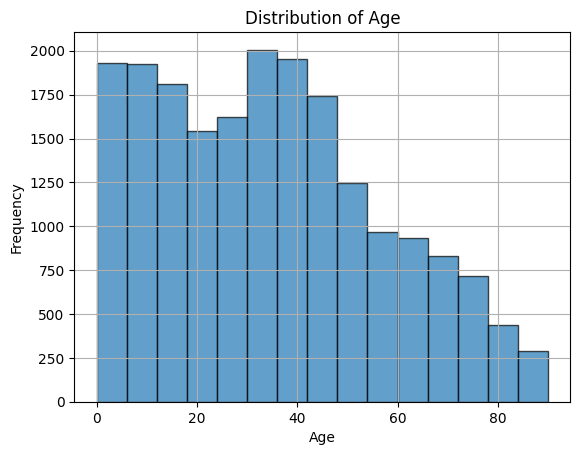

In [21]:
import matplotlib.pyplot as plt

# Plot the distribution of ages
plt.hist(data_processed['age'], bins=15, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)

# Show the plot
plt.show()

Pre-process the dataset using the techniques that you think are suitable for this dataset.

In [22]:
data_processed.isna().sum()

age                                           0
class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in_edu_inst_last_wk                    0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part_time_employment_stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
tax_filer_stat                                0
region_of_previous_residence            

There is no missing value so we do not need to handle that

In [23]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import set_config
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, scale, LabelEncoder
from sklearn.compose import ColumnTransformer

In [24]:
cat_attribs = data_processed.select_dtypes(['object', 'category']).columns

# Starting with the pipeline for categorical attributes
cat_pipeline = Pipeline([
        ("cat_encoder", OneHotEncoder(sparse=False, drop="first", handle_unknown ='ignore'))
    ])

In [25]:
# select the numerical columns
num_attribs = data_processed.select_dtypes(['int64']).columns

# Starting with the pipeline for numerical attributes
num_pipeline = Pipeline([
        ("minmaxscaler", MinMaxScaler())
    ])



In [26]:
# Handle each type of column with appropriate pipeline
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 Index(['age', 'wage_per_hour', 'capital_gains', 'capital_losses',
       'dividends_from_stocks', 'num_persons_worked_for_employer',
       'weeks_worked_in_year', 'year'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('cat_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                spar...
       'migration_code-change_in_msa', 'migration_code-change_in_reg',
       'migration_code-move_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'family_members_under_18',
       'country_of_birth_father', 'country_of_birth_mother',
       'country_of_birth_self', 'citizenship', 'own_business_or_self_employed',
       'fill_inc_questionnaire_for_veteran's_admin', 'veterans_benefits'],
      dtype='object'))])

In [27]:
X_prepared = preprocess_pipeline.fit_transform(data_processed)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
X_prepared

array([[0.52222222, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.43333333, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.62222222, 0.07058824, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.37777778, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.45555556, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.42222222, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

### Clustering

Given the data pre-processed in the previous step, you will find cluster assigments using different algorithms and analyze them.

#### Find the number of clusters

You first will decide how many clusters you will use. **Show all the steps that you used to decide it and explain your reasoning.**

After choosing the number of clusters, use the same value for all clustering algorithms that you will run. Then, you can compare the results between different algorithms.

In [52]:
from sklearn.cluster import KMeans

error = np.zeros(11)
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters = k, n_init = 10)
    kmeans.fit_predict(X_prepared)
    error[k] = kmeans.inertia_

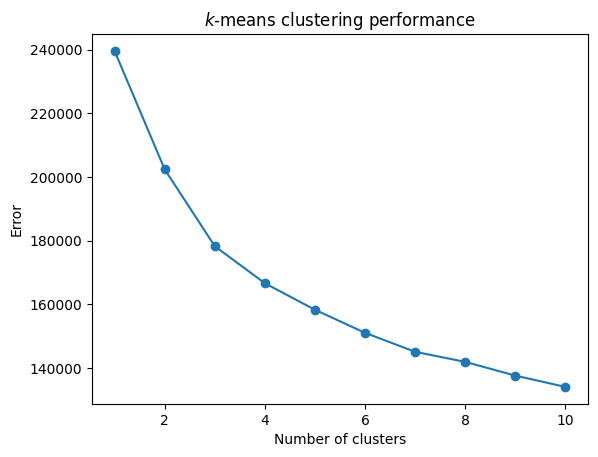

In [53]:
plt.plot(range(1, len(error)), error[1:], 'o-')
plt.xlabel('Number of clusters')
plt.title(r'$k$-means clustering performance')
plt.ylabel('Error');

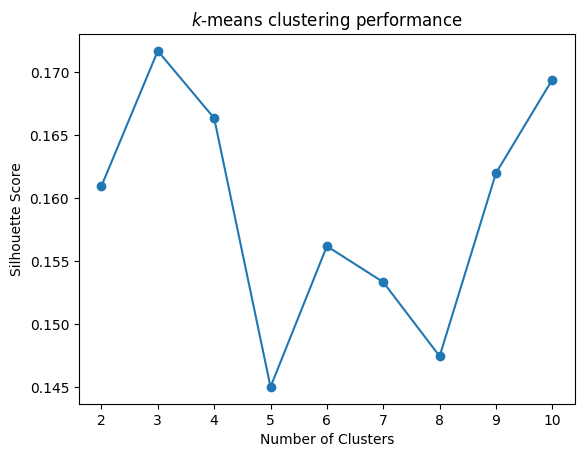

In [54]:
import sklearn.metrics as metrics

def sc_evaluate_clusters(X, max_clusters, n_init, seed):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2, max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters = k, n_init = n_init, random_state = seed)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean')
    return s

s = sc_evaluate_clusters(X_prepared, 10, 10, 1)
plt.plot(range(2, len(s)), s[2:], 'o-')
plt.xlabel('Number of Clusters')
plt.title('$k$-means clustering performance')
plt.ylabel('Silhouette Score');

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

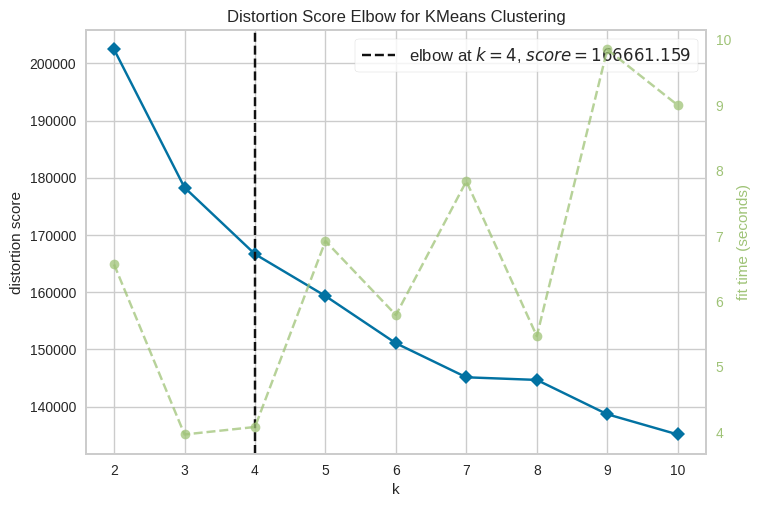

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_prepared)
Elbow_M.show()

Based on a combination different methods, mostly on distortion score and elbow method, the final number of cluster is set to be 4

__Important Note:__ All the rest of your analysis of this dataset will depend on the number of clusters you choose here.  Be careful!  If you choose a number of clusters that is too large, the rest of your analysis will be much slower.

#### Find and interpret the clusters

Using some algorithms, find the clusters and visualize them. You have to use **at least** $K$-means and Agglomerative Clustering (with different linkage functions).

For the Agglomerative Clustering, you should also plot the dendrogram and inspect it.

To reduce the dimensionality of the dataset to 2 dimensions, we recommend you use the following code:

```py
reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42, n_jobs=1)
X_reduced = reducer.fit_transform(X)
```

Then, you can use ```X_reduced``` to visualize the clusters in 2-D.

##### $K$-means

Find your clusters using the $K$-means algorithm.

###### Using K=4 to predict

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = 'k-means++', n_clusters = 4, n_init = 30)
prediction = kmeans.fit_predict(X_prepared)

###### Using reducer to visualize

In [58]:
reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42, n_jobs=1)
X_reduced = reducer.fit_transform(X_prepared)

In [59]:
X_reduced[prediction == 0, 0], X_reduced[prediction == 0, 1]

(array([18.598223  , 22.719858  ,  0.5838386 , ..., 21.949512  ,
        -0.11427554, 22.73769   ], dtype=float32),
 array([ 0.28023577,  6.2353725 , 13.254686  , ..., 13.954068  ,
        15.656107  ,  8.061336  ], dtype=float32))

Visualize the clusters using the X_reduced data.

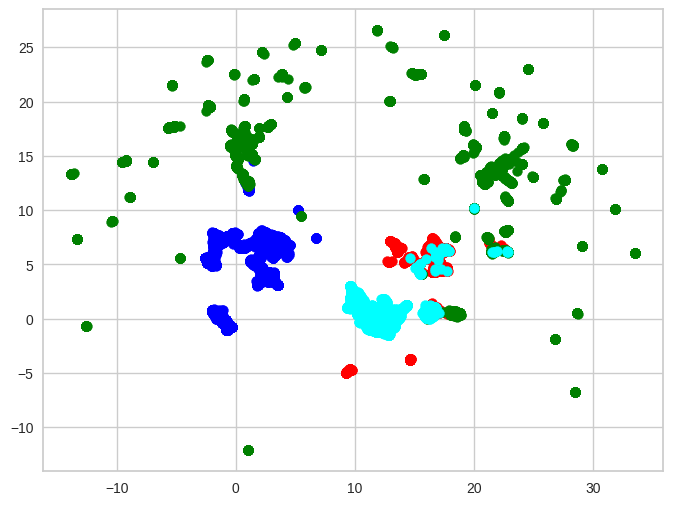

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(X_reduced[prediction == 0, 0], X_reduced[prediction == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_reduced[prediction == 1, 0], X_reduced[prediction == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_reduced[prediction == 2, 0], X_reduced[prediction == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X_reduced[prediction == 3, 0], X_reduced[prediction == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')

What are the clusters' sizes? Are the sizes similar or too distinct?

In [60]:
labels = kmeans.labels_
k=4

# Count the number of data points in each cluster
cluster_sizes = []
for cluster_id in range(k):
    cluster_size = np.sum(labels == cluster_id)
    cluster_sizes.append(cluster_size)

# Print the cluster sizes
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i + 1} size: {size}")


Cluster 1 size: 5349
Cluster 2 size: 5690
Cluster 3 size: 6202
Cluster 4 size: 2711


There is one cluster with relatively much less points. The other 3 clusters I would say have similar sizes.

##### Agglomerative

Find your clusters with agglomerative clustering.

The function below plots the dendrogram of an AgglomerativeClustering object.

Its usage is the following:

```
    plot_dendrogram(agg, truncate_mode="lastp", p=n_clusters)
```

where  ```agg``` is the AgglomerativeClustering object and ```n_clusters``` is the number of clusters used.

**P.S.: To use this function, you have to use the parameter ```compute_distances=True``` in the AgglomerativeClustering**

In [30]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

###### Complete Linkage

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import davies_bouldin_score

agg_cluster_complete = AgglomerativeClustering(n_clusters=4, compute_distances=True, linkage = 'complete')
agg_complete = agg_cluster_complete.fit_predict(X_prepared)

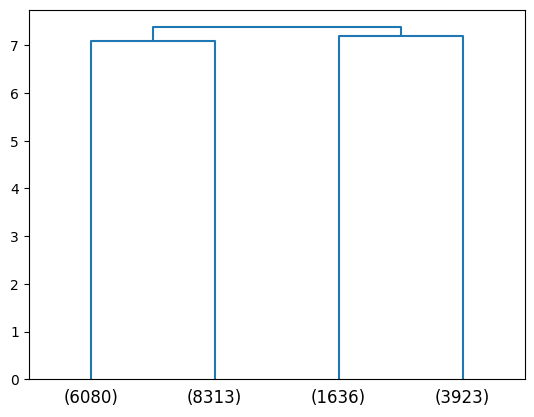

In [32]:
n_clusters = 4
plot_dendrogram(agg_cluster_complete, truncate_mode="lastp", p=n_clusters)

In [63]:
#Adding the Clusters feature to the orignal dataframe.
data_processed["Clusters_complete"]= agg_complete

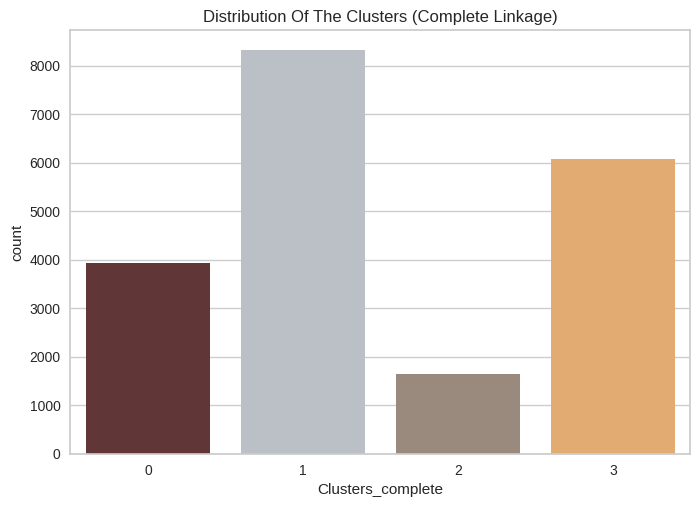

In [64]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data_processed["Clusters_complete"], palette= pal)
pl.set_title("Distribution Of The Clusters (Complete Linkage)")
plt.show()

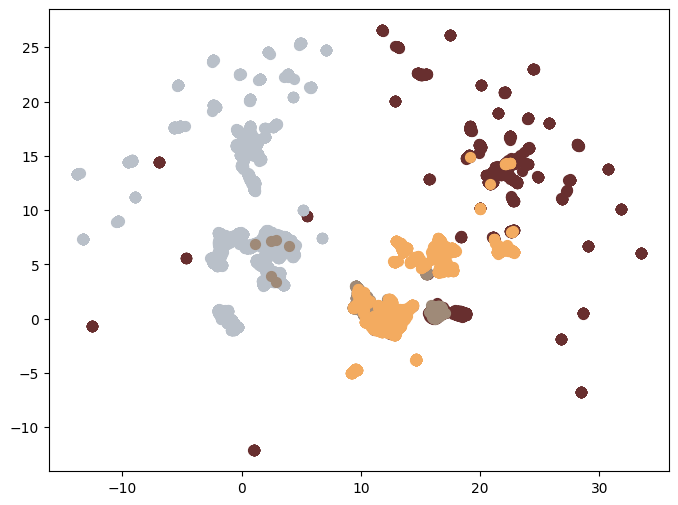

In [ ]:
#reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42, n_jobs=1)
#X_reduced = reducer.fit_transform(X)

#agg_ward
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[agg_complete == 0, 0], X_reduced[agg_complete == 0, 1], s = 50, c = "#682F2F", label = 'Cluster 1')
plt.scatter(X_reduced[agg_complete == 1, 0], X_reduced[agg_complete == 1, 1], s = 50, c = "#B9C0C9", label = 'Cluster 2')
plt.scatter(X_reduced[agg_complete == 2, 0], X_reduced[agg_complete == 2, 1], s = 50, c = "#9F8A78", label = 'Cluster 3')
plt.scatter(X_reduced[agg_complete == 3, 0], X_reduced[agg_complete == 3, 1], s = 50, c = "#F3AB60", label = 'Cluster 4')

Since complete linkage uses the maximum pairwise distance between points in different clusters as the linkage criterion. It tends to form clusters where the maximum distance between any two points within a cluster is minimized, and thus the clusters it forms tend to have points that are relatively far apart from each other within each cluster.

###### Ward's

In [66]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import davies_bouldin_score

agg_cluster_ward = AgglomerativeClustering(n_clusters=4, compute_distances=True)
agg_ward = agg_cluster_ward.fit_predict(X_prepared)

Plot the dendrogram the clustering assignment that you found.

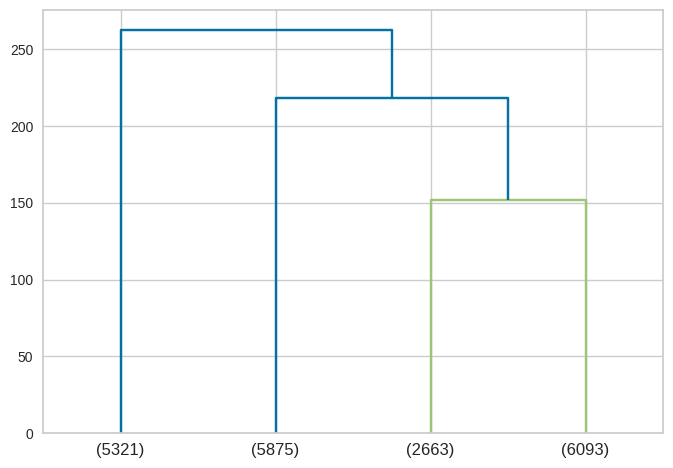

In [67]:
  n_clusters = 4
  plot_dendrogram(agg_cluster_ward, truncate_mode="lastp", p=n_clusters)

Visualize the clusters using the X_reduced data.

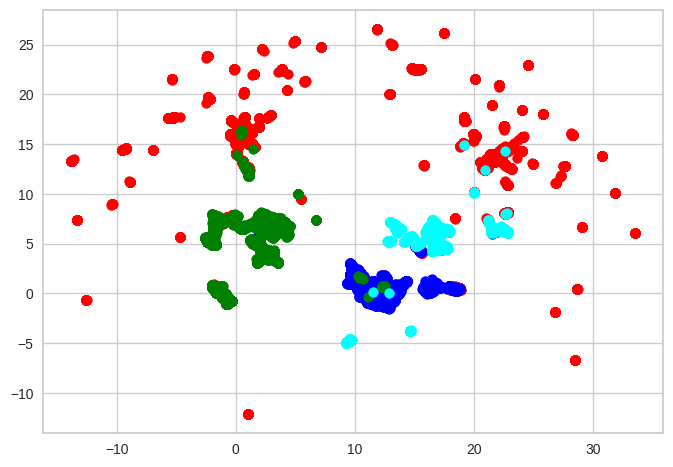

In [68]:
#reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42, n_jobs=1)
#X_reduced = reducer.fit_transform(X)

#agg_ward
plt.scatter(X_reduced[agg_ward == 0, 0], X_reduced[agg_ward == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_reduced[agg_ward == 1, 0], X_reduced[agg_ward == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_reduced[agg_ward == 2, 0], X_reduced[agg_ward == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X_reduced[agg_ward == 3, 0], X_reduced[agg_ward == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')

Plot the distribution of clusters' sizes. How do the cluster sizes compare to the $k$-means clusters?

In [120]:
#Adding the Clusters feature to the orignal dataframe.
data_processed["Clusters_ward"]= agg_ward

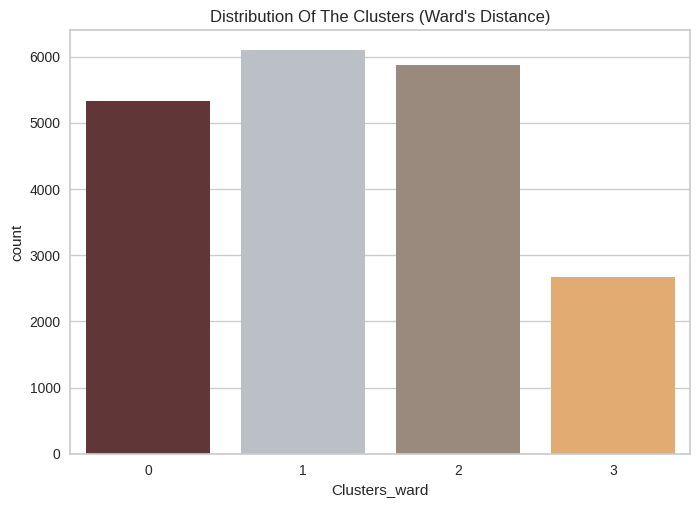

In [121]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
dist_ward = sns.countplot(x=data_processed["Clusters_ward"], palette= pal)
dist_ward.set_title("Distribution Of The Clusters (Ward's Distance)")
plt.show()

Repeat the steps above for **at least** one more linkage functions (in total, you have to use **at least** two linkage functions).

######Single Linkage

In [69]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import davies_bouldin_score

agg_cluster_single = AgglomerativeClustering(n_clusters=4, compute_distances=True, linkage = 'single')
agg_single_pred = agg_cluster_single.fit_predict(X_prepared)

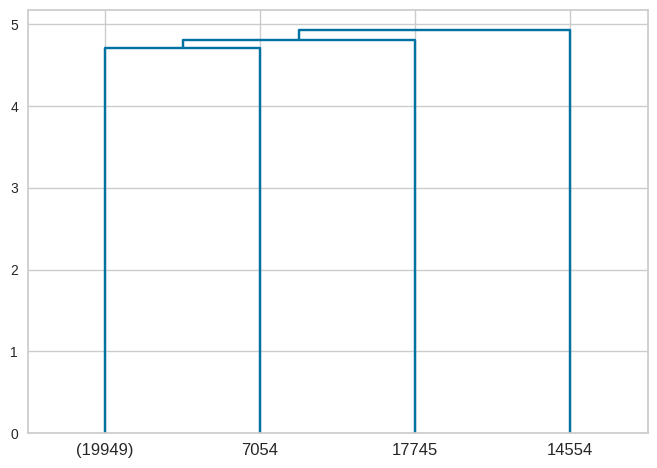

In [70]:
  n_clusters = 4
  plot_dendrogram(agg_cluster_single, truncate_mode="lastp", p=n_clusters)

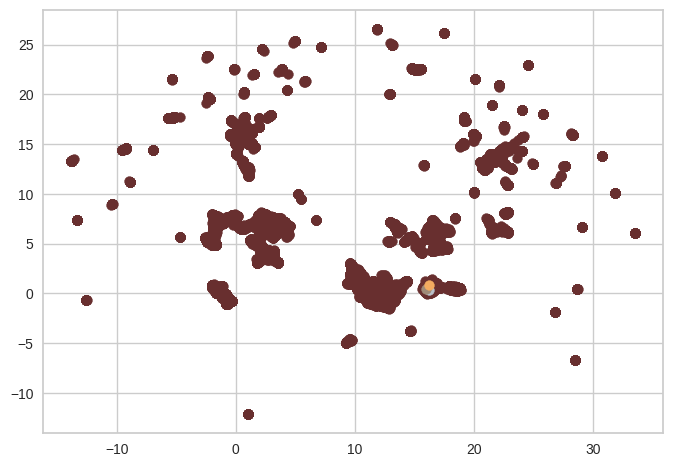

In [71]:
#reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42, n_jobs=1)
#X_reduced = reducer.fit_transform(X)

#agg_ward
plt.scatter(X_reduced[agg_single_pred == 0, 0], X_reduced[agg_single_pred == 0, 1], s = 50, c = "#682F2F", label = 'Cluster 1')
plt.scatter(X_reduced[agg_single_pred == 1, 0], X_reduced[agg_single_pred == 1, 1], s = 50, c = "#B9C0C9", label = 'Cluster 2')
plt.scatter(X_reduced[agg_single_pred == 2, 0], X_reduced[agg_single_pred == 2, 1], s = 50, c = "#9F8A78", label = 'Cluster 3')
plt.scatter(X_reduced[agg_single_pred == 3, 0], X_reduced[agg_single_pred == 3, 1], s = 50, c = "#F3AB60", label = 'Cluster 4')

In [72]:
#Adding the Clusters feature to the orignal dataframe.
data_processed["Clusters_single"]= agg_single_pred

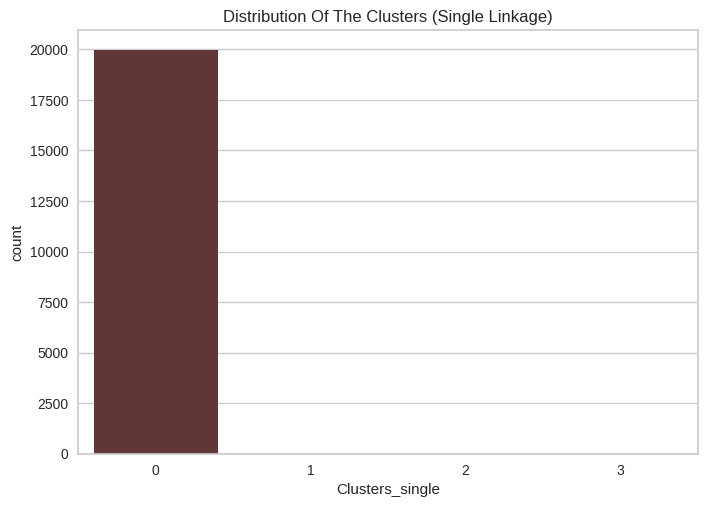

In [73]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
dist_single = sns.countplot(x=data_processed["Clusters_single"], palette= pal)
dist_single.set_title("Distribution Of The Clusters (Single Linkage)")
plt.show()

#### Questions about the clusters

Answer all the questions providing detailed explanations (you can use extra plots/information to support your answers).

1) Regarding the Agglomerative clustering, is there any difference between the clusters found by the linkage methods you used? If yes, cite at least **one** difference and explain how you can identify it.
2) List **one** difference you found between the $K$-means clustering and Agglomerative clustering (specify the linkage you choose to compare) in the data.

**Answer here**

1) Using single linkage method, the size of cluster can be extremely unbalanced, especially in this case (3 clusters have only one datapoint).
Complete-linkage-method clustering produces clusters that are more balanced with diameters that probably would not differ a lot.

 2)Since complete linkage uses the maximum pairwise distance between points in different clusters as the linkage criterion. It tends to form clusters where the maximum distance between any two points within a cluster is minimized, and thus the clusters it forms tend to have points that are relatively far apart from each other within each cluster.
 While K-means assumes that clusters are convex and isotropic, which leads to clusters with more-uniform shape and data points that are more in the middle and less on the boundary of the cluster.

## Part 2

In this problem, we have a series of probes, which are cities with their respective latitudes and longitudes. We also have the latencies measured between some of those cities.

We can think about this data as a graph. Each city is a node, there is an edge between cities when the RTT (round-trip time) was measured between them. Each edge has a cost, which in this case is the RTT.

### Reading and processing the data

The following code is used to process the data and create a graph. You do not need to modify it.

In [33]:
# The following are in meters and meters per second
radius_earth = 40075016.68557849 / (2 * np.pi)
c = 299792458

def get_sphere_point(latlong):
    """Convert Cartesian coordinates to spherical coordinates."""
    latlong = np.array(latlong) * np.pi / 180.
    return np.array([
        np.cos(latlong[1]) * np.cos(latlong[0]),
        np.sin(latlong[1]) * np.cos(latlong[0]),
        np.sin(latlong[0])
    ])

def get_spherical_distance(a, b):
    """Find the distance on the unit sphere between two unit vectors."""
    # The value of (a @ b) is clamped between -1 and 1 to avoid issues
    # with floating point
    return np.arccos(min(max(a @ b, -1.), 1.))

def get_GCD_latency(latlong_a, latlong_b):
    """Find the great circle latency between two points on Earth."""
    # Convert spherical coordinates to Cartesian coordinates
    p_a = get_sphere_point(latlong_a)
    p_b = get_sphere_point(latlong_b)

    # Compute the latency, which is the travel time at the rate of two
    # thirds the speed of light
    return get_spherical_distance(p_a, p_b) * radius_earth / (2. * c / 3.)

def get_graph(probes_file_path, latencies_file_path, epsilon):
    """
    Generate a NetworkX graph representing a delay space.

    As input, take two CSV files (for nodes and edges), and a special
    cutoff parameter `epsilon` that determines when an edge should be
    included in the graph.
    """
    # Create the graph
    graph = nx.Graph()

    # Get the vertecies
    with open(probes_file_path) as probes_file:
        probes_reader = csv.DictReader(probes_file)
        for row in probes_reader:
            graph.add_node(
                row['id'],
                city=row['city'], country=row['country'],
                lat=float(row['latitude']), long=float(row['longitude'])
            )

    # Get the edges
    with open(latencies_file_path) as latencies_file:
        latencies_reader = csv.DictReader(latencies_file)
        for row in latencies_reader:
            id_source = row['source_id']
            id_target = row['target_id']
            lat_source = graph.nodes[id_source]['lat']
            long_source = graph.nodes[id_source]['long']
            lat_target = graph.nodes[id_target]['lat']
            long_target = graph.nodes[id_target]['long']
            rtt = float(row['rtt'])

            # Only add edges satisfying the cutoff requirement
            if (
                rtt - get_GCD_latency(
                    [lat_source, long_source],
                    [lat_target, long_target]
                )
            ) < epsilon:
                # If there is multiple sets of RTT data for a single
                # edge, only pay attention to the minimal one
                if ((id_source, id_target) not in graph.edges
                        or graph.edges[id_source,id_target]['rtt'] > rtt):
                    graph.add_edge(id_source, id_target, weight=1., rtt=rtt)

    # Delete nodes with no edges
    nodes = list(graph.nodes)
    for node in nodes:
        if len(graph.edges(node)) == 0:
            graph.remove_node(node)

    return graph

def get_network_plot(graph):
    """
        Plot a NetworkX graph.
    """
    fig, ax = plt.subplots(1, 1)
    ax.set_aspect('equal')

    # Plot the vertices
    for _, data in graph.nodes(data=True):
        ax.plot(data['long'], data['lat'], '.', ms=4, color='green')

    return fig

def get_cluster_center(cluster):
    """Find the point in the cluster nearest to its centroid."""
    sphere_points = [
        get_sphere_point((data['lat'], data['long']))
        for _, data in cluster
    ]
    centroid_direction = sum(sphere_points)
    center_index = np.argmax([
        centroid_direction @ sphere_point
        for sphere_point in sphere_points
    ])

    return cluster[center_index]

def graph_from_cluster(graph, cluster_labels):
    """
        Simplify a graph using a clustering assignment.
    """
    if np.any(cluster_labels == -1):
        raise Exception("There are noise points with no cluster assigned.")

    nodes = list(graph.nodes(data=True))
    new_graph = nx.Graph()
    cluster_count = len(np.unique(cluster_labels))

    # Copy nodes to new graph
    clusters = [[] for _ in range(cluster_count)]
    cluster_centers = []
    for (node, data), label in zip(nodes, cluster_labels):
        clusters[label].append((node, data))
    for cluster in clusters:
        node, data = get_cluster_center(cluster)
        cluster_centers.append(node)
        new_graph.add_node(node, **data)

    # Copy edges to new graph
    for i, cluster_i in enumerate(clusters):
        for j, cluster_j in enumerate(clusters[i+1:], start=i+1):
            rtt = min([
                graph.edges[node_i,node_j]['rtt']
                for node_i, _ in cluster_i
                for node_j, _ in cluster_j
                if (node_i, node_j) in graph.edges
            ], default=np.inf)
            if rtt != np.inf:
                new_graph.add_edge(cluster_centers[i], cluster_centers[j],
                                   rtt=rtt)

    return new_graph

In [34]:
probs_path = '/content/drive/MyDrive/homework-1-tuetkwanwing/probes.csv'
latencies_path = '/content/drive/MyDrive/homework-1-tuetkwanwing/latencies.csv'

In [35]:
probs = pd.read_csv('/content/drive/MyDrive/homework-1-tuetkwanwing/probes.csv')
latencies = pd.read_csv(latencies_path)

Now, we create a graph with the data and plot the nodes (cities).

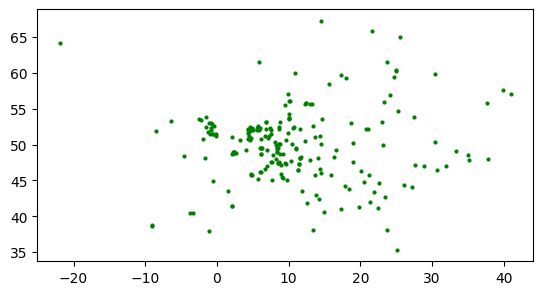

In [36]:
epsilon = 7
unclustered_graph = get_graph(probs_path , latencies_path , epsilon)
get_network_plot(unclustered_graph)
plt.show()

In [37]:
len(unclustered_graph.nodes())

218

### Clustering cities

The objective of this question is to reduce the number of nodes in this graph. Each node represents a location, and we want to cluster locations which are really close (e.g. in the same Metro area). A point of attention here is that: we want to cluster only locations that are **extremely** close. For instance, it is not the goal to have a cluster with Boston and NYC. Instead, we want to have Boston and Cambridge in the same clusters.

You have to find clusters of nodes using their latitude and longitude data. Then, we will use your clustering assignment to represent each cluster by its centroid.

**You are to use at least two algorithms: DBSCAN and K-Means**.

You will work with the latitude and longitude data of each probe location.

In [38]:
nodes = list(unclustered_graph.nodes(data=True))
X = np.array([[data['lat'], data['long']] for _, data in nodes])
X[:10, :]

array([[53.8915, 27.4605],
       [42.6685, 23.3975],
       [44.1195, 27.2595],
       [50.0595, 14.4795],
       [49.2115, 16.6015],
       [47.5015, 19.0385],
       [46.2595, 20.1505],
       [50.2485, 18.9985],
       [52.2315, 21.0005],
       [52.2075, 20.8075]])

**You have to cluster the array ```X```.**

Implement your cluster method below.

**P.S.:** The DBSCAN algorithm assign noise points (points that were not assigned to any cluster) the same label (in this case, -1). We want you to make each noise point a cluster with only one point.

As an example, suppose that you have the following cluster assignment:

```py
cluster_labels = [-1, 1, 1, 2, 2, -1]
```

You have to make each noise point a cluster. Then, you would have:

```py
cluster_labels = [3, 1, 1, 2, 2, 4]
```

#### DBSCAN

Cluster the array ```X``` using DBSCAN.

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
len(X)

218

In [41]:
db = DBSCAN(min_samples=2, eps =0.3).fit(X)

In [42]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  2,
       -1,  1,  2, -1,  3, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  4,  4, -1, -1, -1,  5,  6,  7,  8, -1, -1,  7,  9,  8, -1,  9,
        5,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 10, -1, -1, 11, 10,
       -1, -1, -1, -1, -1, -1, 11, -1, -1, -1, -1, 12, 12, -1, -1, -1, 13,
       -1, -1, -1, 13, -1, -1, -1, 14, -1, 15, 15, 16, 16, 16, 16, -1, -1,
       17, 18, -1, -1, -1, 19, 20, 18, 18, -1, 19, 18, 19, -1, -1, 18, 18,
       18, 20, -1, 18, -1, 21, -1, 22, -1, 23, 24, 25, 26, -1, -1, -1, 25,
       27, 27, 25, 26, -1, -1, 28, 26, -1, -1, -1, -1, 22, -1, 23, 25, 24,
       -1, -1, -1, 21, -1, -1, -1, -1, -1, -1, 23, -1, -1, -1, 28, 27, 29,
       29, 29, 29, 30, -1, 31, 32, 33, 34, 33, -1, 33, 30, 31, 34, -1, 32,
       33, -1, 35, 35, 35, -1, -1, 36, 36, 14, 35, 17, -1, -1])

In [43]:
from copy import deepcopy
labels_array = deepcopy(db.labels_)

In [44]:
np.unique(labels_array)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36])

In [45]:

n=0
for i in range(len(labels_array)):

  if labels_array[i] == -1:
    labels_array[i] = labels_array[i] + 38 + n
    n= n+1
  else:
    continue
    #print(labels_array)



In [46]:
labels_array

array([ 37,  38,  39,  40,  41,  42,  43,  44,   0,   0,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,   1,   1,   2,  66,   1,   2,  67,   3,
        68,  69,   3,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         4,   4,  80,  81,  82,   5,   6,   7,   8,  83,  84,   7,   9,
         8,  85,   9,   5,   6,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  10,  96,  97,  11,  10,  98,  99, 100, 101, 102, 103,
        11, 104, 105, 106, 107,  12,  12, 108, 109, 110,  13, 111, 112,
       113,  13, 114, 115, 116,  14, 117,  15,  15,  16,  16,  16,  16,
       118, 119,  17,  18, 120, 121, 122,  19,  20,  18,  18, 123,  19,
        18,  19, 124, 125,  18,  18,  18,  20, 126,  18, 127,  21, 128,
        22, 129,  23,  24,  25,  26, 130, 131, 132,  25,  27,  27,  25,
        26, 133, 134,  28,  26, 135, 136, 137, 138,  22, 139,  23,  25,
        24, 140, 141, 142,  21, 143, 144, 145, 146, 147, 148,  2

In [47]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  2,
       -1,  1,  2, -1,  3, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  4,  4, -1, -1, -1,  5,  6,  7,  8, -1, -1,  7,  9,  8, -1,  9,
        5,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 10, -1, -1, 11, 10,
       -1, -1, -1, -1, -1, -1, 11, -1, -1, -1, -1, 12, 12, -1, -1, -1, 13,
       -1, -1, -1, 13, -1, -1, -1, 14, -1, 15, 15, 16, 16, 16, 16, -1, -1,
       17, 18, -1, -1, -1, 19, 20, 18, 18, -1, 19, 18, 19, -1, -1, 18, 18,
       18, 20, -1, 18, -1, 21, -1, 22, -1, 23, 24, 25, 26, -1, -1, -1, 25,
       27, 27, 25, 26, -1, -1, 28, 26, -1, -1, -1, -1, 22, -1, 23, 25, 24,
       -1, -1, -1, 21, -1, -1, -1, -1, -1, -1, 23, -1, -1, -1, 28, 27, 29,
       29, 29, 29, 30, -1, 31, 32, 33, 34, 33, -1, 33, 30, 31, 34, -1, 32,
       33, -1, 35, 35, 35, -1, -1, 36, 36, 14, 35, 17, -1, -1])

##### Visualizing your solution

Using the ```graph_from_cluster``` and ```get_network_plot```, plot your $K$-means solution and the original graph (which is in the variable ```unclustered_graph```).

In [48]:
len(db.labels_)

218

In [49]:
#besides noise point, we have 37 unique clusters
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36])

In [50]:
db_label_graph = graph_from_cluster(unclustered_graph, labels_array)

In [51]:
#db_label_graph.edges()

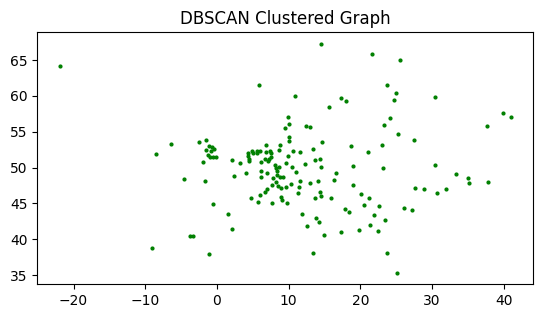

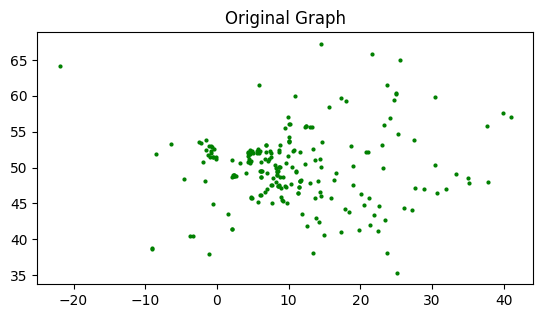

In [52]:
get_network_plot(db_label_graph)
plt.title("DBSCAN Clustered Graph")
get_network_plot(unclustered_graph)
plt.title("Original Graph")
plt.show()

How many cluster did you find?

In [53]:
len(np.unique(labels_array))

160

After turning noise points into their own clusters, we have 160 clusters in total

Plot the distribution of clusters sizes that you found.

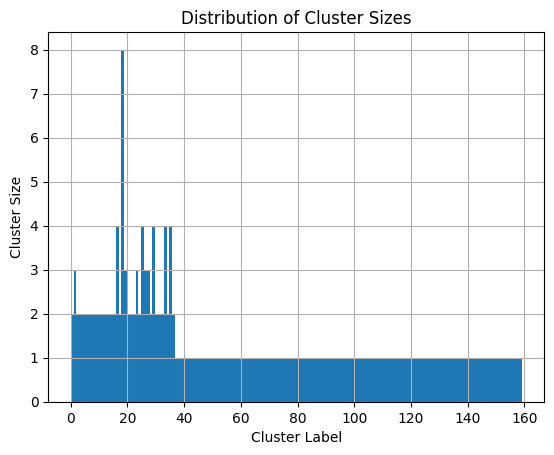

In [57]:
plt.hist(labels_array, bins = 160) # bins = 160 because we have 160 cluster labels
plt.xlabel('Cluster Label')
plt.ylabel('Cluster Size')
plt.title('Distribution of Cluster Sizes')
plt.grid(True)
plt.show()

##### Analyzing the clustering

We stated before that we want only extremely close cities to be in the same clusters. We will now check if your clustering assignment satisfies this requirement.

We are giving you the DataFrame ```cities```, with a pair of cities and countries that represent each node.

The first row of ```cities``` represents the first row of the array ```X``` that you clustered. Then, you can directly use your clustering assignment to identify cities that are in the same cluster.

In [58]:
cities = pd.DataFrame(np.array([[data['city'], data['country']] for _, data in nodes]), columns=["city", "country"])
cities

,city,country
0,Minsk,Belarus
1,Sofia,Bulgaria
2,Silistra,Bulgaria
3,Prague,Czechia
4,Brno,Czechia
...,...,...
213,Gais,Switzerland
214,Winterthur,Switzerland
215,Geneve,Switzerland
216,Stabio,Switzerland


In [59]:
cities['label'] = labels_array

In [60]:
cities.head()

,city,country,label
0,Minsk,Belarus,37
1,Sofia,Bulgaria,38
2,Silistra,Bulgaria,39
3,Prague,Czechia,40
4,Brno,Czechia,41


Compute how many countries are in each cluster. Then, show how many clusters have only one country, how many have only two countries, etc.

In [61]:
df = cities.groupby('label').nunique().reset_index()
df

,label,city,country
0,0,2,1
1,1,3,1
2,2,2,1
3,3,2,1
4,4,2,1
...,...,...,...
155,155,1,1
156,156,1,1
157,157,1,1
158,158,1,1


In [62]:
df['country'].unique()

array([1, 2])

In [63]:
len(df[df['country'] == 1])

158

In [64]:
len(df[df['country'] == 2])

2

we have 158 clusters with 1 country and 2 clusters with 2 countries.

What is the percentage of clusters that have **only one** country?

Answer: 98.75% of clusters have only one country

In [65]:
num_of_clusters = len(np.unique(labels_array))
num_of_clusters

160

In [66]:
percentage = len(df[df['country'] == 1])/num_of_clusters
percentage

0.9875

Select the cluster with the highest number of countries and print its cities and respective countries (if there is more than one, select any).

In [67]:
df[df['country'] == 2]

,label,city,country
14,14,2,2
17,17,2,2


here it reports that cluster14 and cluster17 contain two countries

In [68]:
cities[cities['label'] == 14]

,city,country,label
109,Feldkirch,Austria,14
213,Gais,Switzerland,14


In [69]:
cities[cities['label'] == 17]

,city,country,label
119,Prévessin-Moëns,France,17
215,Geneve,Switzerland,17


Select one city that is not from the majority country in the cluster selected above. Search this city on Google Maps and check if this city is close to the majority country in the cluster. This is a way to check the quality of the cluster.
**Write below just the city that you selected**.

I check how far away Prévessin-Moëns and Geneve are from each other, they are indeed quite close.

#### $K$-means

Cluster the array ```X``` using $K$-means. **Explain how you defined the number of clusters**.

In [70]:
from sklearn.cluster import KMeans

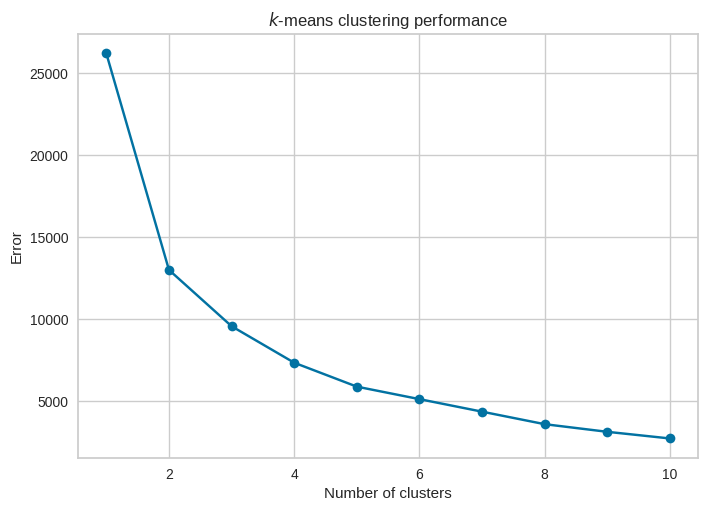

In [76]:
error = np.zeros(11)
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters = k, n_init = 10)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_

plt.plot(range(1, len(error)), error[1:], 'o-')
plt.xlabel('Number of clusters')
plt.title(r'$k$-means clustering performance')
plt.ylabel('Error');

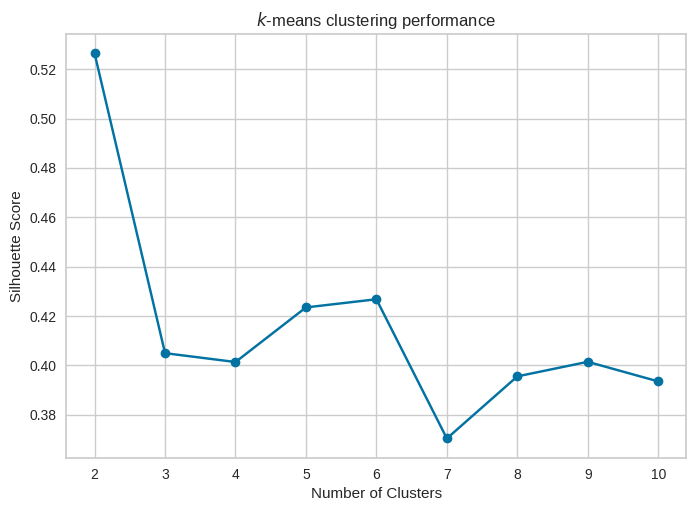

In [77]:
import sklearn.metrics as metrics

def sc_evaluate_clusters(X, max_clusters, n_init, seed):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2, max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters = k, n_init = n_init, random_state = seed)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean')
    return s

s = sc_evaluate_clusters(X, 10, 10, 1)
plt.plot(range(2, len(s)), s[2:], 'o-')
plt.xlabel('Number of Clusters')
plt.title('$k$-means clustering performance')
plt.ylabel('Silhouette Score');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

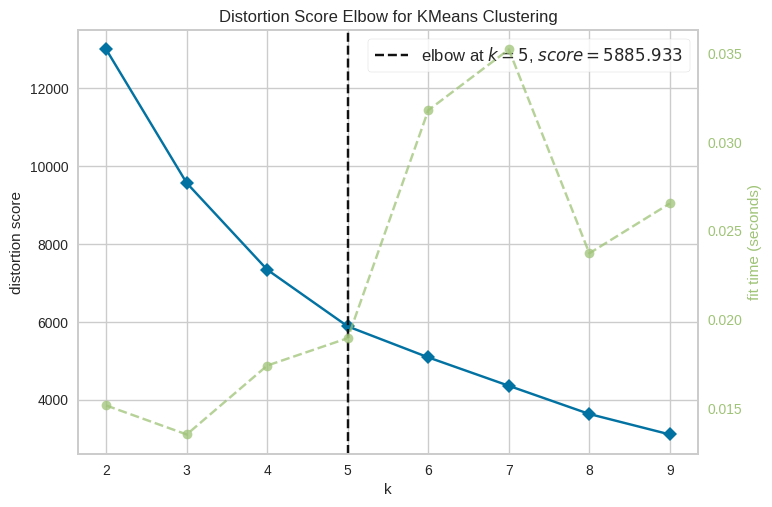

In [79]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

Based on the third graph, I decide to go with k=5

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = 'k-means++', n_clusters = 5, n_init = 30)
prediction_city = kmeans.fit_predict(X)

In [72]:
kmeans.labels_

array([4, 2, 2, 0, 2, 2, 2, 2, 4, 4, 0, 4, 4, 1, 2, 1, 2, 2, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 3, 3,
       3, 4, 4, 4, 0, 0, 4, 4, 0, 0, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [73]:
from copy import deepcopy
kmeans_labels_array = kmeans.labels_

##### Visualizing your solution

Using the ```graph_from_cluster``` and ```get_network_plot```, plot your $K$-means solution and the original graph (which is in the variable ```unclustered_graph```).

In [74]:
kmeans_label_graph = graph_from_cluster(unclustered_graph, kmeans_labels_array)

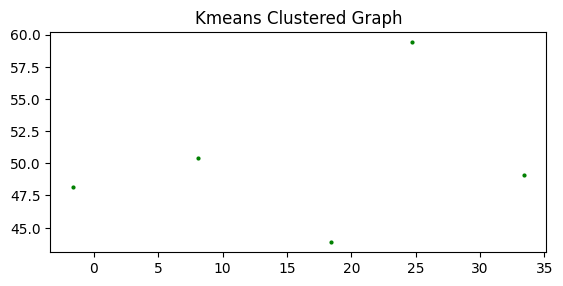

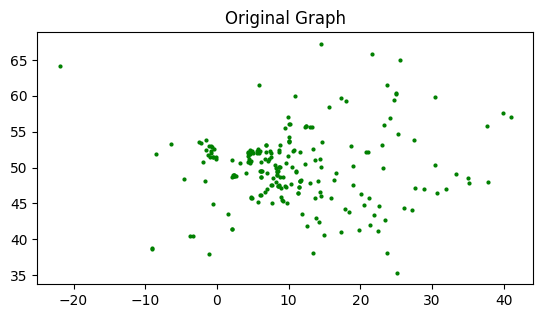

In [75]:
get_network_plot(kmeans_label_graph)
plt.title("Kmeans Clustered Graph")
get_network_plot(unclustered_graph)
plt.title("Original Graph")
plt.show()

Plot the distribution of clusters sizes that you found.

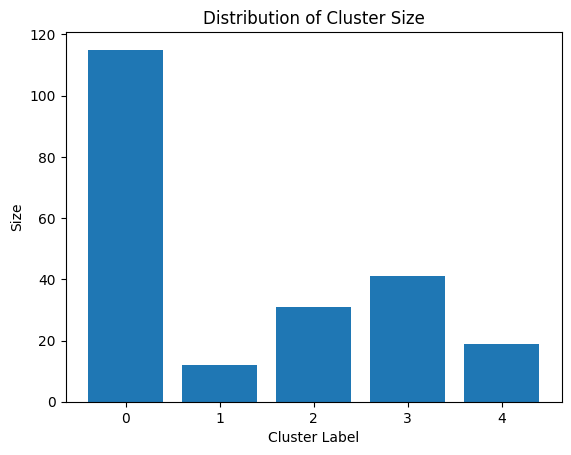

In [76]:
unique_numbers, counts = np.unique(kmeans_labels_array, return_counts=True)

# Create a bar chart to visualize the distribution
plt.bar(unique_numbers, counts)

# Add labels and title
plt.xlabel('Cluster Label')
plt.ylabel('Size')
plt.title('Distribution of Cluster Size')

# Show the chart
plt.show()

##### Analyzing the clustering

We stated before that we want only extremely close cities to be in the same clusters. We will now check if your clustering assignment satisfies this requirement.

Use the same DataFrame ```cities```.

In [77]:
cities['kmeans_label'] = kmeans_labels_array

Compute how many countries are in each cluster. Then, show how many clusters have only one country, how many have only two countries, etc.

In [78]:
df1 = cities.groupby('kmeans_label').nunique().reset_index()
df1

,kmeans_label,city,country,label
0,0,115,13,73
1,1,12,4,12
2,2,31,15,31
3,3,41,6,27
4,4,19,9,17


In [79]:
df1['country'].unique()

array([13,  4, 15,  6,  9])

We can simply tell from the table df1, that we have 5 clusters, with 6, 15, 13, 4, 9 countries respectively.

What is the percentage of clusters that have **only one** country?

In [94]:
len(df1[df1['country'] == 1])

0

Select the cluster with the highest number of countries and print its cities and respective countries (if there is more than one, select any).

In [86]:
max_index = df1['country'].idxmax()

# Get the row information based on the max index
max_country_kmeans_label = df1.at[max_index, 'kmeans_label']
max_country_kmeans_label

2

In [87]:
cities[cities['kmeans_label'] == max_country_kmeans_label]

,city,country,label,kmeans_label
1,Sofia,Bulgaria,38,2
2,Silistra,Bulgaria,39,2
4,Brno,Czechia,41,2
5,Budapest,Hungary,42,2
6,Szeged,Hungary,43,2
7,Katowice,Poland,44,2
14,Bucharest,Romania,49,2
16,Timisoara,Romania,51,2
17,Drobeta-Turnu Severin,Romania,52,2
28,Chervonograd,Ukraine,63,2


Select one city that is not from the majority country in the cluster. Search this city on Google Maps and check if this city is close to the majority country in the cluster. This is a way to check the quality of the cluster.
**Write below just the city that you selected**.

I tried to check two cities to compare with Italy (the majority country).
Ljubjana is fairly close, but not Cambridge-Boston kind of close, while Belgrade is somewhat far away.
Thus the quality of Kmeans clusters in this case is not desirable.

### Questions

1) Cite **two** diferences between $K$-means and DBSCAN algorithms.

**Answer here:**

One thing I notice is that for Kmeans we would usually start with attempting to pick a optimal number of cluster for the algorithm while DBSCAN does not need one since it is a density-based clustering algorithm that groups together data points that are close to each other in high-density regions. Because DBSCAN groups 'densely grouped' data points into a single cluster, it works much better on this clustering city task.

Another difference is that DBSCAN uses the concept of core points, which should have a sufficient number of neighbors within a specified radius. I learn that core points are data points from the dataset itself while centroids are virtual points representing the center of clusters in K-means and do not belong to any data point. And centroids are calculated as the average of data points within a cluster.